# 코랩에서 사용하시는 분들은 꼭 아래 3가지 파일을 런타임에 올려서 사용하시길 바랍니다:)( 다른 방식으로 수정하셔도 좋아요)
embedding_dict.pickle</br>
embedding_list.pickle</br>
테스트 데이터 수집용(응답) - 설문지 응답 시트1.csv</br>




In [1]:
import gensim
import os
import numpy as np

In [2]:
#워드 임베딩 파일 경로
#filepath = os.path.join(os.getcwd(), 'word_embedding\\fasttext\\ko.bin')
#filepath

In [3]:
#워드 임베딩 불러오기
# from gensim.models import FastText as FT
# model = FT.load_fasttext_format(filepath)

In [4]:
#관심사 리스트
preferences = [
    '여행', '낚시', '등산',
    '자전거', '운동', '골프',
    '반려동물', '식물', '종교',
    '맛집', '와인', '술',
    '영화', '사진', '미술',
    '노래', '음악', '악기',
    '책', '패션', '뷰티',
    '투자', '인테리어', '결혼']

In [5]:
#해당 코드는 임베딩 벡터를 사용할 때 유효한 코드입니다. 평상시 사용하지 않습니다.
# preferences_loc = {}
# vectors = []
# for i in preferences:
#     preferences_loc[i] = model.wv.get_vector(i)
#     vectors.append(model.wv.get_vector(i))

In [6]:
import pickle
with open('embedding_dict.pickle', 'rb') as fw:
    preference_loc = pickle.load(fw)

In [7]:
with open('embedding_list.pickle', 'rb') as fw2:
    vectors = pickle.load(fw2)

In [8]:
#임베딩 벡터를 시각화하기 위해 2차원으로 축소합시다 방법은 두가지
#1.PCA
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
pca_vec = pca.fit_transform(vectors)

#2.TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_vec = tsne.fit_transform(vectors)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [9]:
tsne_vec.shape

(24, 2)

In [10]:
  #colab 전용 한글 폰트 설치
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


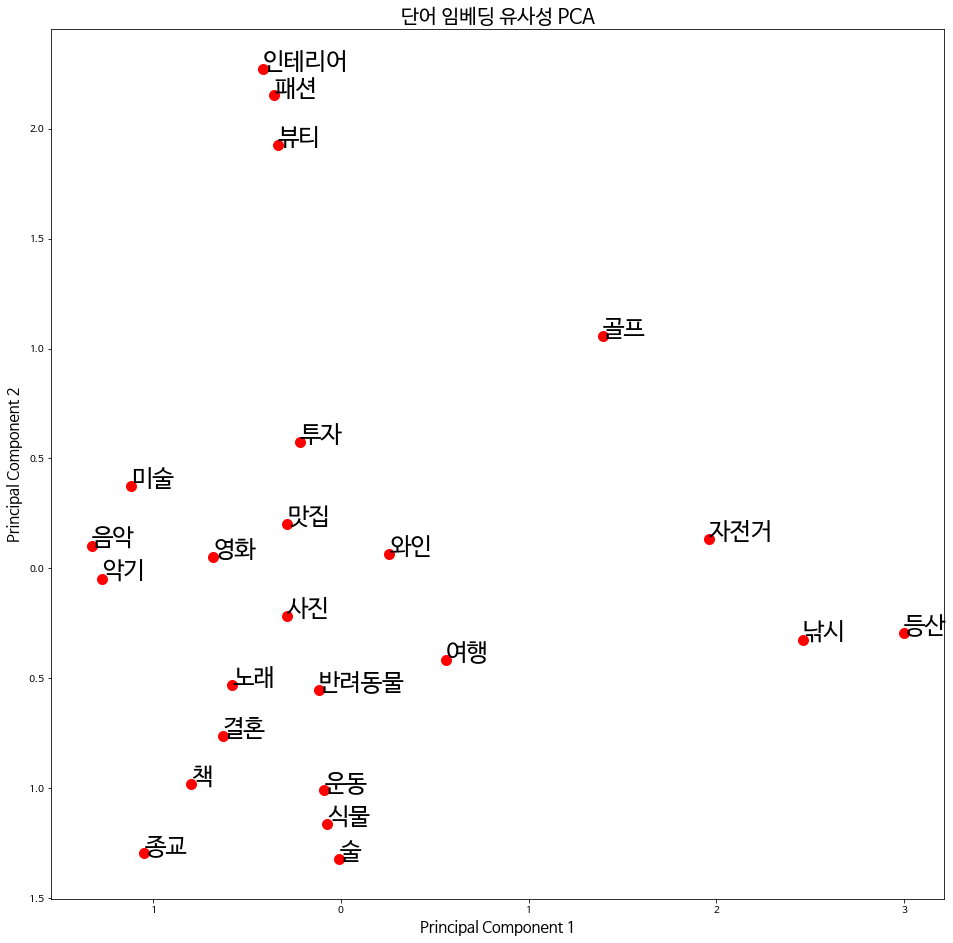

In [11]:
#시각화 해봅시당
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

fig = plt.figure(figsize = (16, 16))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('단어 임베딩 유사성 PCA', fontsize=20)

plt.scatter(pca_vec[:,0],pca_vec[:,1],s=100,color="red")
for i, label in enumerate(preferences):
    plt.annotate(label, (pca_vec[i][0], pca_vec[i][1]), fontsize= 24 )

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


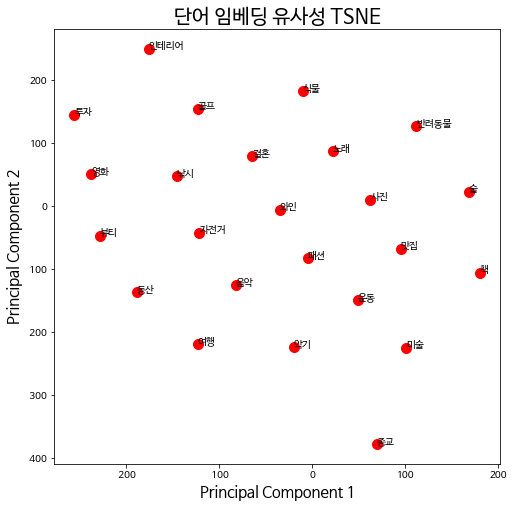

In [32]:
#시각화 해봅시당
import matplotlib.pyplot as pl
plt.rc('font', family='NanumBarunGothic')

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('단어 임베딩 유사성 TSNE', fontsize=20)

plt.scatter(tsne_vec[:,0],tsne_vec[:,1],s=100,color="red")
for i, label in enumerate(preferences):
    plt.annotate(label, (tsne_vec[i][0], tsne_vec[i][1]) )

In [13]:
pca_vec

array([[ 0.55759262, -0.4172131 ],
       [ 2.45961745, -0.32413936],
       [ 2.99650029, -0.29322744],
       [ 1.96174179,  0.13240868],
       [-0.08717483, -1.01003438],
       [ 1.39586848,  1.05616945],
       [-0.11642995, -0.55446699],
       [-0.07147375, -1.16140845],
       [-1.04581938, -1.29683687],
       [-0.28604493,  0.20356325],
       [ 0.25826476,  0.06726299],
       [-0.00833464, -1.3238642 ],
       [-0.67881954,  0.05337962],
       [-0.28924415, -0.21584411],
       [-1.11816574,  0.37313721],
       [-0.57789202, -0.53026209],
       [-1.32581607,  0.10334107],
       [-1.27053565, -0.04711272],
       [-0.79797802, -0.98041537],
       [-0.35548665,  2.15196713],
       [-0.3367502 ,  1.92775657],
       [-0.2183998 ,  0.57394626],
       [-0.4167195 ,  2.2741336 ],
       [-0.62850058, -0.76224075]])

In [14]:
#클러스터링 진행
from sklearn.cluster import KMeans

#최적 군집수 찾아내기
inertia_li = []
for i in range(1,24):
    km = KMeans(n_clusters=i).fit(vectors)
    rlt_tsm = km.predict(vectors)
    inertia_li.append(km.inertia_)
inertia_li

[252.5771518771741,
 226.50061621337534,
 212.3641213555182,
 197.751413551594,
 184.153519516545,
 167.72150380371164,
 154.6109074523605,
 147.25497054300948,
 133.9433388353592,
 124.19224306273777,
 112.0650545595954,
 99.6725708551463,
 92.20264551804684,
 76.85139665150314,
 68.9955123106445,
 58.01274901326918,
 50.65865462481338,
 38.42900840676051,
 29.656025840339584,
 21.751624365144387,
 13.680942083585476,
 7.504810234583773,
 2.7226179604143557]

([<matplotlib.axis.XTick at 0x7fa8c2513090>,
 <a list of 19 Text major ticklabel objects>)

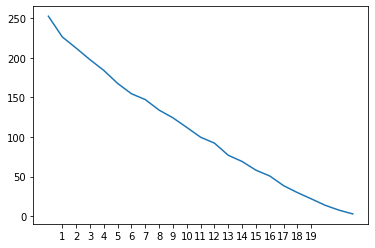

In [15]:
plt.plot(inertia_li)
plt.xticks(range(1,20))

In [16]:
n_cluster = 4
km = KMeans(n_clusters = n_cluster).fit(vectors)
rlt_tsm = km.predict(vectors)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45210 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text

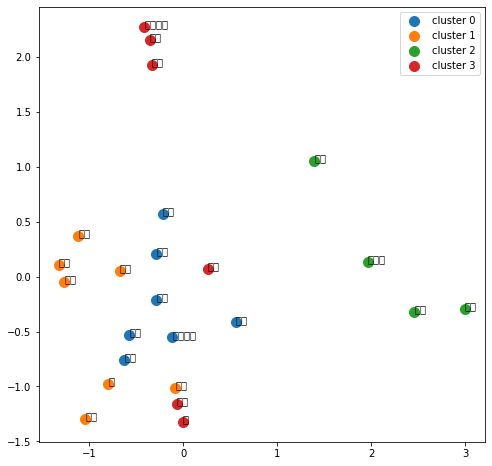

In [17]:
#시각화 해봅시당
import matplotlib.pyplot as pl
plt.rc("font", family="Malgun Gothic")
fig = plt.figure(figsize = (8, 8))

for i in range(n_cluster):
    label_name = "cluster " + str(i)
    plt.scatter(pca_vec[rlt_tsm == i][:,0],pca_vec[rlt_tsm == i][:,1],s=100, label = label_name)
for i, label in enumerate(preferences):
    plt.annotate(label, (pca_vec[i][0], pca_vec[i][1]))
plt.legend()

In [18]:
#관심사 리스트에 대한 임베딩 벡터 생성
embedding_matrix = np.zeros((24, 200))
embedding_matrix.shape

(24, 200)

In [19]:
preferences

['여행',
 '낚시',
 '등산',
 '자전거',
 '운동',
 '골프',
 '반려동물',
 '식물',
 '종교',
 '맛집',
 '와인',
 '술',
 '영화',
 '사진',
 '미술',
 '노래',
 '음악',
 '악기',
 '책',
 '패션',
 '뷰티',
 '투자',
 '인테리어',
 '결혼']

In [20]:
def get_vector(word):
    return preference_loc[word]

for i, word in enumerate(preferences):
    embedding_matrix[i] = get_vector(word)

In [21]:
#임베딩 벡터가 잘 만들어졌는지 확인
embedding_matrix[23]

array([ 2.00712785e-01,  1.09802581e-01,  1.19888455e-01, -3.06543291e-01,
        2.86817849e-01, -1.14380553e-01, -1.99304417e-01, -1.21618509e-01,
        1.00625716e-01, -5.34833193e-01,  5.45972399e-03,  3.73650491e-01,
        7.05862939e-01,  6.64559826e-02,  1.43829674e-01, -2.70776182e-01,
        5.78733198e-02, -3.41771692e-01,  1.35351598e-01, -2.18056083e-01,
       -7.08934069e-02,  7.14180887e-01,  2.18957573e-01,  3.81131433e-02,
        1.89589545e-01, -1.32939696e-01, -3.88368845e-01,  5.05838618e-02,
        2.03135833e-01, -1.01564974e-01,  6.05334081e-02,  1.86597988e-01,
        2.82844342e-02, -1.56578422e-01, -1.80166543e-01, -3.77014428e-01,
        1.51093081e-01,  2.31539503e-01,  5.10174558e-02,  4.87799287e-01,
        2.91092694e-01,  6.64669871e-02, -1.16653152e-01,  3.12760621e-02,
       -8.21822807e-02,  1.91434324e-01, -1.52224243e-01,  3.22501302e-01,
        8.37059468e-02, -2.31048286e-01,  7.75344521e-02, -1.65816158e-01,
        2.38634214e-01,  

In [22]:
import pandas as pd
csvpath = os.path.join(os.getcwd(), '테스트 데이터 수집용(응답) - 설문지 응답 시트1.csv')
df = pd.read_csv(csvpath)

df

,타임스탬프,귀하의 성함은 무엇입니까?,귀하의 성별은 무엇입니까?,가장 관심있는 3가지를 선택해주세요. [1순위],가장 관심있는 3가지를 선택해주세요. [2순위],가장 관심있는 3가지를 선택해주세요. [3순위],귀하의 거주지역은 어디입니까?,귀하의 종교는 무엇입니까?,귀하의 직업은 무엇입니까?,귀하의 체형은 무엇입니까?,귀하의 음주량은 어느 정도 입니까?,남기고 싶으신 말씀 있으시면 적어주세요!
0,2022. 5. 13 오후 5:23:54,조윤행,남자,음악,노래,운동,서울특별시,무교,무직,보통,적당히,후...
1,2022. 5. 13 오후 5:24:09,최두봉,남자,운동,술,맛집,울산광역시,무교,무직,보통,적당히,굳
2,2022. 5. 13 오후 5:24:19,박경국,남자,운동,음악,책,서울특별시,무교,무직,근육형,적당히,NaN
3,2022. 5. 13 오후 5:24:33,한승효,여자,사진,술,여행,서울특별시,무교,무직,보통,적당히,추천팀 다시 화이팅!!!
4,2022. 5. 13 오후 5:27:30,박재형,남자,운동,맛집,술,경기도,무교,무직,보통,적당히,:)
5,2022. 5. 13 오후 5:28:18,이태우,남자,투자,술,영화,경기도,무교,학생,보통,적당히,🙃
6,2022. 5. 13 오후 5:31:06,안나,여자,책,맛집,미술,서울특별시,기독교,NaN,보통,적당히,프로젝트 힘내세요 ㅋㅋ 3번은 안되어요~
7,2022. 5. 13 오후 5:31:20,김혜수,여자,여행,자전거,등산,서울특별시,없어요,무직,보통,적당히,추천팀 화이팅!! 최선을 다하는 열쩡!! 멋져요☺️
8,2022. 5. 13 오후 5:33:09,강미라,여자,여행,반려동물,식물,인천광역시,NaN,무직,보통,적당히,NaN
9,2022. 5. 13 오후 5:34:58,정호영,남자,사진,음악,투자,경기도,무교,무직,NaN,적당히,👍👍👍👍


In [23]:
#필요한 부분만 가져오기
df = df.iloc[:,1:6]
df

,귀하의 성함은 무엇입니까?,귀하의 성별은 무엇입니까?,가장 관심있는 3가지를 선택해주세요. [1순위],가장 관심있는 3가지를 선택해주세요. [2순위],가장 관심있는 3가지를 선택해주세요. [3순위]
0,조윤행,남자,음악,노래,운동
1,최두봉,남자,운동,술,맛집
2,박경국,남자,운동,음악,책
3,한승효,여자,사진,술,여행
4,박재형,남자,운동,맛집,술
5,이태우,남자,투자,술,영화
6,안나,여자,책,맛집,미술
7,김혜수,여자,여행,자전거,등산
8,강미라,여자,여행,반려동물,식물
9,정호영,남자,사진,음악,투자


In [24]:
old_columns = df.columns
new_columns = [
    'name', 'sex', 'preference1', 'preference2', 'preference3'
]
rename_dict = {}
for old, new in zip(old_columns, new_columns):
    rename_dict[old] = new

df.rename(columns=rename_dict, inplace= True)

df.iloc[:, 1:]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sex,preference1,preference2,preference3
0,남자,음악,노래,운동
1,남자,운동,술,맛집
2,남자,운동,음악,책
3,여자,사진,술,여행
4,남자,운동,맛집,술
5,남자,투자,술,영화
6,여자,책,맛집,미술
7,여자,여행,자전거,등산
8,여자,여행,반려동물,식물
9,남자,사진,음악,투자


In [25]:
for i in range(1,4):
    df[f'preference{i}'] = df[f'preference{i}'].apply(lambda x: preferences.index(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
df.iloc[:, 1:]

,sex,preference1,preference2,preference3
0,남자,16,15,4
1,남자,4,11,9
2,남자,4,16,18
3,여자,13,11,0
4,남자,4,9,11
5,남자,21,11,12
6,여자,18,9,14
7,여자,0,3,2
8,여자,0,6,7
9,남자,13,16,21


In [27]:
def make_matrix(df):
    temp_dict = {}
    for i in df.index:
        person_matrix = np.zeros((3,200))
        for j in range(1,4):
            prefer = df.iloc[i][f'preference{j}']
            person_matrix[j-1] = embedding_matrix[prefer]
        temp_dict[df.iloc[i]['name']] = np.average(person_matrix, axis= 0).reshape((1,-1))
    return temp_dict

person = make_matrix(df)

In [28]:
person['조윤행'].shape

(1, 200)

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

class similarity():
    def __init__(self, person_matrix):
        self.person_matrix = person_matrix

    def get_similarity(self, name1):
        temp_dict = {}
        for name in person:
            if name == name1:
                continue
            else:
                temp_dict[name] = cosine_similarity(person[name1], person[name])
            
        return temp_dict


In [30]:
test = similarity(person)
test.get_similarity('조윤행')

{'강미라': array([[0.34029917]]),
 '김지영': array([[0.41343571]]),
 '김혜수': array([[0.37373807]]),
 '박경국': array([[0.86703448]]),
 '박병찬': array([[0.61161743]]),
 '박재형': array([[0.58709693]]),
 '안나': array([[0.58725264]]),
 '유신영': array([[0.56932284]]),
 '이동엽': array([[0.40038474]]),
 '이지은': array([[0.36174257]]),
 '이태우': array([[0.44093968]]),
 '임병윤': array([[0.43034958]]),
 '장원서': array([[0.65517816]]),
 '전상언': array([[0.35905053]]),
 '전상택': array([[0.53640167]]),
 '정호영': array([[0.63622322]]),
 '제이든': array([[0.41020468]]),
 '최두봉': array([[0.58709693]]),
 '한승효': array([[0.44015928]])}

In [31]:
cosine_similarity(person['조윤행'], person['박병찬'])

array([[0.61161743]])